# MODULE 9 - Regression Methods

This week we shall cover a number of popular regression methods used by data scientists for performing predictions using supervised machine learning techniques. Regression methods (the data scientist's workhorse) are used to predict continuous (numeric) response variables using both continuous and catgorical predictors.

# Simple Linear Regression

Let's start out with a simple yet comprehensive example of performing linear regression using a single predictor.

In [ ]:
%matplotlib inline

# Import required libraries for performing regression:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Data access using Pandas pd.read.csv

In [8]:
# Read the CSV file : data is class ... pandas.core.frame.DataFrame
data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Display list of variables in data set

In [9]:
list(data)

['MODELYEAR',
 'MAKE',
 'MODEL',
 'VEHICLECLASS',
 'ENGINESIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUELTYPE',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

Let's do some EDA by using a scatterplot. Looks like a linear trend

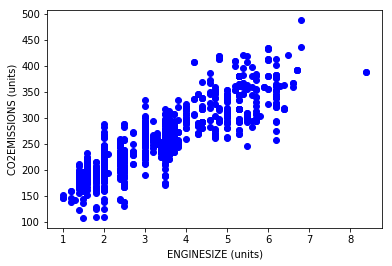

In [33]:
# Select 2 variables for simple linear regression
data = data[["ENGINESIZE","CO2EMISSIONS"]]    # Throw away all other variables
# ENGINESIZE vs CO2EMISSIONS:
plt.scatter(data["ENGINESIZE"] , data["CO2EMISSIONS"] , color="blue")
plt.xlabel("ENGINESIZE (units)")
plt.ylabel("CO2EMISSIONS (units)")
plt.show()         # Draw plot

Supervised machine learning requires us to split the data set into training and test

In [32]:
# Create training set (80%) and test set (20%)
# Does not look like this code samples randomly from data
train = data[:(int((len(data)*0.8)))]   # 1-853
test = data[(int((len(data)*0.8))):]    # 854-1067
print(type(train), type(test))         # Slice 2 new data frames
print(data.shape)
print(train.shape)
print(test.shape)
print("length of training set", len(train))
print(int(len(data)*0.8))
trainx = data[:853]

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(1067, 2)
(853, 2)
(214, 2)
length of training set 853
853


Now use sklearn package's LinearRegression algorithm to model the data. Trying to predict CO2 emissions by
engine size.

In [37]:
regr = linear_model.LinearRegression()

# data for linear model must be in np.array?
train_x = np.array(train[["ENGINESIZE"]])    # Feature variable
train_y = np.array(train[["CO2EMISSIONS"]])  # Response variable

# Perform ordinary least squares fit
regr.fit(X=train_x,y=train_y)  

# Calculated the coefficient of determination, R-squared
print("R-squared:", regr.score(X=train_x, y=train_y))

# Print the coefficients:
print ("coefficient : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_) #Intercept

R-squared: 0.7565253709288298
coefficient :  [[38.79512384]]
Intercept :  [127.16989951]


In [23]:
print(regr)
print(type(regr))
print(type(train_x))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
<class 'numpy.ndarray'>


Now use the fit model to plot the regression line on the scatterplot

Text(0, 0.5, 'Emission')

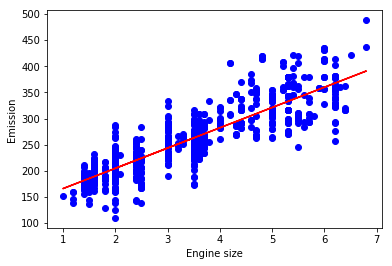

In [16]:
# Scatterplot using training set
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color='blue')

# Use calculated coefficients to plot regression line
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Define a UDF to use coefficient of fit model to make predictions of unknown data

In [27]:
# Predicting CO2 emissions:
# Function for predicting future values of CO2:
def get_regression_predictions(X,intercept,slope):
 predicted_values = X*slope + intercept
 return predicted_values

# Predicting emission for future car:
new_engine_size = 3.5
estimatd_emission = get_regression_predictions(X=new_engine_size,intercept=regr.intercept_[0],slope=regr.coef_[0][0])
print ("Estimated Emission :",estimatd_emission)

Estimated Emission : 262.9528329350172


In [18]:
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)            # Use predict() method on test set

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))

# Calc RMSE
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 20.60
Mean sum of squares (MSE): 746.45
R2-score: 0.71


# Multiple Linear Regression

Now let's extend our use of linear regression to situations were multiple predictors are required.

In [38]:
%matplotlib inline

# Import the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [83]:
# Read the CSV file:
data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Use train_test_split method to create randomized training and test sets

In [72]:
# Split data into training and test sets 

from sklearn.model_selection import train_test_split
X=data[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]     # Create X DataFrame
print(type(X))

y=data["CO2EMISSIONS"]       # Create y series
print(type(y))

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

print(type(train_x),type(test_x), type(train_y), type(test_y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


Train the multiple linear regression model

In [73]:
# Using sklearn package to model data
regr = linear_model.LinearRegression()

Call fit method to train the algorithm using the training set

In [74]:
# Fit the linear model using training set
regr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Explore the fitted linear model

In [75]:
# print the coefficient values:
coeff_data = pd.DataFrame(regr.coef_ , X.columns , columns=["Coefficients"])
print("Coefficients:", coeff_data)

# Perform test set predictions using trained model regr
Y_pred = regr.predict(test_x)

# Check accuracy using R-squared
from sklearn.metrics import r2_score
R = r2_score(test_y , Y_pred)          
print ("R² :",R)         # .936 great!

Coefficients:                           Coefficients
ENGINESIZE                    8.961151
CYLINDERS                     7.240237
FUELCONSUMPTION_CITY        -13.001567
FUELCONSUMPTION_HWY          -5.472156
FUELCONSUMPTION_COMB         21.866973
FUELCONSUMPTION_COMB_MPG     -4.034460
R² : 0.9034041224574011


# Polynomial Regression

Sometimes you may encounter data that does not follow a linear trend. Sometimes you'll find that the data follows a polynomial trend. In this case a useful technique is polynomial regression. First, let's take a look at some plots for various forms of polynomial data.

In [46]:
%matplotlib inline

# Import required libraries:
import numpy as np
import matplotlib.pyplot as plt

### Polynomial Functions and Their Graphs

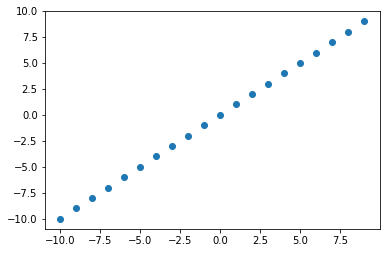

In [85]:
# Plot for y=x
x=np.arange(-10,10)
y=x
plt.scatter(x,y)

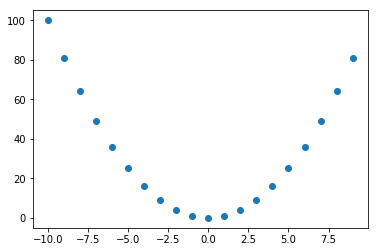

In [86]:
# Plot for y=x^2  quadratic polynomial
x=np.arange(-10,10)
y=np.power(x,2)
plt.scatter(x,y)

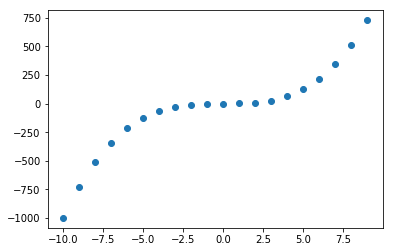

In [87]:
# Plot for y=x^3 cubic polynomial
x=np.arange(-10,10)
y=np.power(x,3)
plt.scatter(x,y)

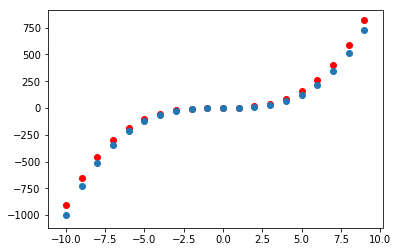

In [88]:
# Plot for y=x^3+x^2+x
# Plot for y=x^3

x=np.arange(-10,10)
y=np.power(x,3)
y1=np.power(x,3)+np.power(x,2)+x

# Notice the highest order term in the polynomial is most influential in the plot
plt.scatter(x,y1,c="red")
plt.scatter(x,y)

Generate simulated data set for explorying polynomial regression

In [117]:
# Generate simulated datapoints: array sequence from -5 to 5 in steps of .1
x = np.arange(-5,5,0.1)
print(x)
print(len(x))   # 100

# Generate error term (normal distribution)
y_noise = 20 * np.random.normal(size = len(x))

# 3rd order polynomial including error term
y = 1*(x**3) + 1*(x**2) + 1*x + 3+y_noise
print(y)

[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

Use a scatterplot to visualize the non-linear relationship

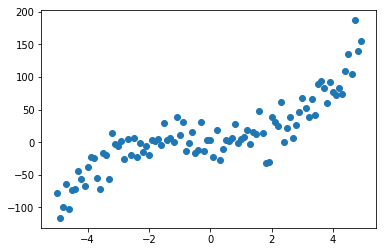

In [48]:
plt.scatter(x,y)

In [118]:
# Make polynomial data:
x1 = x                   # x^1 term of polynomial
x2 = np.power(x1,2)      # x^2 term of polynomial
x3 = np.power(x1,3)      # x^3 term of polynomial
n = len(x1)     # 100

print("Class of x:",type(x))
print(n)
print(x1)

Class of x: <class 'numpy.ndarray'>
100
[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  

In [119]:
# Reshaping data: transpose (1,n) to (n,1) dimension
x1_new = np.reshape(x1,(n,1))
x2_new = np.reshape(x2,(n,1))
x3_new = np.reshape(x3,(n,1))

print(x1_new)

[[-5.00000000e+00]
 [-4.90000000e+00]
 [-4.80000000e+00]
 [-4.70000000e+00]
 [-4.60000000e+00]
 [-4.50000000e+00]
 [-4.40000000e+00]
 [-4.30000000e+00]
 [-4.20000000e+00]
 [-4.10000000e+00]
 [-4.00000000e+00]
 [-3.90000000e+00]
 [-3.80000000e+00]
 [-3.70000000e+00]
 [-3.60000000e+00]
 [-3.50000000e+00]
 [-3.40000000e+00]
 [-3.30000000e+00]
 [-3.20000000e+00]
 [-3.10000000e+00]
 [-3.00000000e+00]
 [-2.90000000e+00]
 [-2.80000000e+00]
 [-2.70000000e+00]
 [-2.60000000e+00]
 [-2.50000000e+00]
 [-2.40000000e+00]
 [-2.30000000e+00]
 [-2.20000000e+00]
 [-2.10000000e+00]
 [-2.00000000e+00]
 [-1.90000000e+00]
 [-1.80000000e+00]
 [-1.70000000e+00]
 [-1.60000000e+00]
 [-1.50000000e+00]
 [-1.40000000e+00]
 [-1.30000000e+00]
 [-1.20000000e+00]
 [-1.10000000e+00]
 [-1.00000000e+00]
 [-9.00000000e-01]
 [-8.00000000e-01]
 [-7.00000000e-01]
 [-6.00000000e-01]
 [-5.00000000e-01]
 [-4.00000000e-01]
 [-3.00000000e-01]
 [-2.00000000e-01]
 [-1.00000000e-01]
 [-1.77635684e-14]
 [ 1.00000000e-01]
 [ 2.0000000

In [120]:
# First column of matrix X:
x_bias = np.ones((n,1))   # Replicate 20 ones as a column vector (n,1)
#print(x_bias)

# Form the complete x matrix:
x_new = np.append(x_bias,x1_new,axis=1)   # Append column vector (n,1) to another column vector (n,1)
x_new = np.append(x_new,x2_new,axis=1)
x_new = np.append(x_new,x3_new,axis=1)

print(x_new.shape)   
# (20,4)

# Find transpose of matrix
x_new_transpose = np.transpose(x_new)
print(x_new_transpose.shape)
# (4,20)

# Find dot product of original and transposed matrix
# Using numpy.ndarray.dot form of dot
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)   # (4,20) * (20,4)   
print(x_new_transpose_dot_x_new)    # (4,4)

# Find inverse of matrix
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)# Find the dot product of transposed x and y
temp_2 = x_new_transpose.dot(y)

# Find coefficients
theta = temp_1.dot(temp_2)
theta

# Store coefficient values in different variables:
beta_0 = theta[0]
beta_1 = theta[1]
beta_2 = theta[2]
beta_3 = theta[3]

print("Coefficients:", beta_0, beta_1, beta_2, beta_3)

(100, 4)
(4, 100)
[[ 1.00000000e+02 -5.00000000e+00  8.33500000e+02 -1.25000000e+02]
 [-5.00000000e+00  8.33500000e+02 -1.25000000e+02  1.25083330e+04]
 [ 8.33500000e+02 -1.25000000e+02  1.25083330e+04 -3.12500000e+03]
 [-1.25000000e+02  1.25083330e+04 -3.12500000e+03  2.23526744e+05]]
Coefficients: -1.6218523685405373 -0.08049544416454069 1.3873596740968472 1.03212079879021


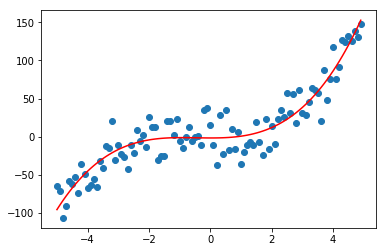

In [121]:
# Plot the polynomial curve
plt.scatter(x,y)
plt.plot(x,beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3,c="red")

In [122]:
# Define rediction function, calc y-hat using coefficients
def prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3):
 y_hat = beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3
 return y_hat
 
# Make predictions
y_hat = prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3)
print(y_hat)
print(y_hat.shape)
# (20,)

[-95.55048314 -89.34489877 -83.41501073 -77.75462627 -72.35755269
 -67.21759726 -62.32856725 -57.68426993 -53.27851259 -49.1051025
 -45.15784693 -41.43055316 -37.91702846 -34.61108011 -31.50651538
 -28.59714155 -25.8767659  -23.3391957  -20.97823822 -18.78770074
 -16.76139054 -14.89311488 -13.17668106 -11.60589633 -10.17456798
  -8.87650328  -7.7055095   -6.65539393  -5.71996383  -4.89302649
  -4.16838917  -3.53985916  -3.00124372  -2.54635014  -2.16898568
  -1.86295763  -1.62207326  -1.44013984  -1.31096465  -1.22835496
  -1.18611805  -1.1780612   -1.19799167  -1.23971675  -1.29704371
  -1.36377983  -1.43373237  -1.50070863  -1.55851586  -1.60096135
  -1.62185237  -1.6149962   -1.5742001   -1.49327137  -1.36601727
  -1.18624507  -0.94776206  -0.64437551  -0.26989268   0.18187913
   0.71713266   1.34206063   2.06285577   2.8857108    3.81681844
   4.86237143   6.02856248   7.32158432   8.74762967  10.31289127
  12.02356183  13.88583408  15.90590074  18.08995454  20.44418821
  22.974794

In [123]:
# Define function err to calculate Mean Square Error (MSE) to find accuracy of model:
def err(y_hat,y):
 var = (y - y_hat)
 var = var*var
 n = len(var)
 MSE = var.sum()
 MSE = MSE/n
 
 return MSE

In [125]:
# Calculate the error for the prediction

print(y_hat.shape)
# (100,)
print(y.shape)
# (100,)

print(y_hat)
print(y)

error = err(y_hat,y)
error

(100,)
(100,)
[-95.55048314 -89.34489877 -83.41501073 -77.75462627 -72.35755269
 -67.21759726 -62.32856725 -57.68426993 -53.27851259 -49.1051025
 -45.15784693 -41.43055316 -37.91702846 -34.61108011 -31.50651538
 -28.59714155 -25.8767659  -23.3391957  -20.97823822 -18.78770074
 -16.76139054 -14.89311488 -13.17668106 -11.60589633 -10.17456798
  -8.87650328  -7.7055095   -6.65539393  -5.71996383  -4.89302649
  -4.16838917  -3.53985916  -3.00124372  -2.54635014  -2.16898568
  -1.86295763  -1.62207326  -1.44013984  -1.31096465  -1.22835496
  -1.18611805  -1.1780612   -1.19799167  -1.23971675  -1.29704371
  -1.36377983  -1.43373237  -1.50070863  -1.55851586  -1.60096135
  -1.62185237  -1.6149962   -1.5742001   -1.49327137  -1.36601727
  -1.18624507  -0.94776206  -0.64437551  -0.26989268   0.18187913
   0.71713266   1.34206063   2.06285577   2.8857108    3.81681844
   4.86237143   6.02856248   7.32158432   8.74762967  10.31289127
  12.02356183  13.88583408  15.90590074  18.08995454  20.444188

363.99789163948816

# Exponential Regression

An exponential regression is the process of finding the equation of the exponential function that fits best for a set of data. As a result, we get an equation of the form y=ab^x where a≠0.

In [1]:
# Import required libraries:
import numpy as np
import matplotlib.pyplot as plt

# Use non-linear least squares to fit a function, f, to data.
from scipy.optimize import curve_fit

In [2]:
# Generate simulated datapoints
day = np.arange(0,8)
print(day.shape)
# (8,)
print(day)

weight = np.array([251,209,157,129,103,81,66,49])
print(weight.shape)
# (8,)
print(weight)


(8,)
[0 1 2 3 4 5 6 7]
(8,)
[251 209 157 129 103  81  66  49]


In [6]:
# Exponential Function
def expo_func(x, a, b):
 return a * b ** x

# Curve_fit to find the optimal parameter values. It returns two variables, called popt, pcov.
# popt:
# Optimal values for the parameters so that the sum of the squared residuals of 
# f(xdata, *popt) - ydata is minimized.

# pcov:
# The estimated covariance of popt
popt, pcov = curve_fit(expo_func, day, weight)
print(popt.shape)
# (2,)
print(popt)
print(pcov.shape)
# (2,2)
print(pcov)

weight_pred = expo_func(day,popt[0],popt[1])
print(weight_pred.shape)
# (8,)
print(weight_pred)

(2,)
[254.0485724   0.7963651]
(2, 2)
[[ 8.94298129e+00 -8.06359265e-03]
 [-8.06359265e-03  1.66434385e-05]]
(8,)
[254.0485724  202.31541639 161.11693652 128.30790503 102.17993743
  81.37253594  64.80224761  51.6062483 ]


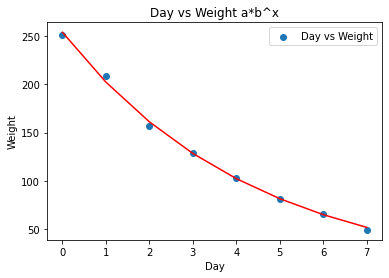

The equation of regression line is y=254.0486*0.7964^x


In [ ]:
# Scatter plot Day vs. predicted Weight
plt.plot(day, weight_pred, 'r-')
plt.scatter(day,weight,label='Day vs Weight')
plt.title("Day vs Weight a*b^x")
plt.xlabel('Day')
plt.ylabel('Weight')
plt.legend()
plt.show()

# Display equation with coefficients
a=popt[0].round(4)   # Coefficient
b=popt[1].round(4)   # Coefficient
print(f'The equation of regression line is y={a}*{b}^x')

# Sinusoidal Regression

Some real-life examples of sinusoidal regression:

- Generation of music waves
- Sound travels in waves
- Trigonometric functions in constructions
- Used in space flights 
- GPS location calculations
- Architecture
- Electrical current
- Radio broadcasting
- Low and high tides of the ocean
- Buildings

Sometimes we have data that shows patterns like a sine wave. Therefore, in such case scenarios, we use a sinusoidal regression. 

In [7]:
# Import required libraries:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

Generate the simulated data set

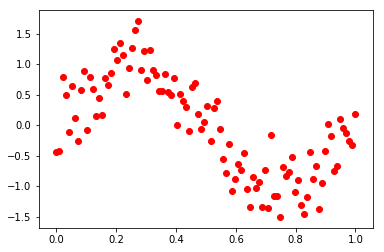

In [8]:
# Y = A*sin(B(X + C)) + D
# A = Amplitude
# Period = 2*pi/B
# Period = Length of One Cycle
# C = Phase Shift (In Radian)
# D = Vertical Shift

X = np.linspace(0,1,100) #(Start,End,Points)

# Here…
# A = 1
# B= 2*pi
# B = 2*pi/Period
# Period = 1
# C = 0
# D = 0

Y = 1*np.sin(2*np.pi*X)

# Adding some Noise :
Noise = 0.4*np.random.normal(size=100)

Y_data = Y + Noise

plt.scatter(X,Y_data,c="r")

Here we have created a function called “calc_sine” to calculate the value of output based on optimal coefficients. Here we will use the scikit-learn library to find the optimal parameters.

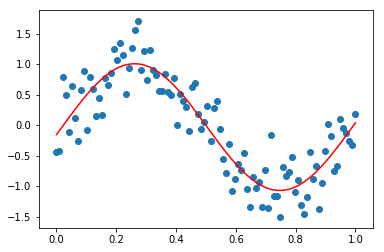

0.8175739174484498


In [9]:
# Calculate the value:
def calc_sine(x,a,b,c,d):
 return a * np.sin(b* ( x + np.radians(c))) + d

# Finding optimal parameters :
popt,pcov = curve_fit(calc_sine,X,Y_data)

# Plot the main data :
plt.scatter(X,Y_data)# Plot the best fit curve :
plt.plot(X,calc_sine(X,*popt),c="r")
plt.show()

# Check the accuracy :
Accuracy =r2_score(Y_data,calc_sine(X,*popt))
print (Accuracy)

Why does a sinusoidal regression perform better than linear regression?

If we check the accuracy of the model after fitting our data with a straight line, we can see that the accuracy in prediction is less than that of sine wave regression. That is why we use sinusoidal regression.

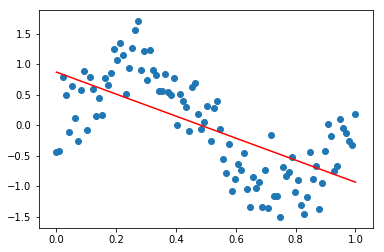

Accuracy of Linear Model :  0.4359650108209695


In [10]:
# Function to calculate the value :
def calc_line(X,m,b):
 return b + X*m

# It returns optimized parametes for our function :
# popt stores optimal parameters
# pcov stores the covarience between each parameters.
popt,pcov = curve_fit(calc_line,X,Y_data)

# Plot the main data :
plt.scatter(X,Y_data)

# Plot the best fit line :
plt.plot(X,calc_line(X,*popt),c="r")
plt.show()

# Check the accuracy of model :
Accuracy =r2_score(Y_data,calc_line(X,*popt))
print ("Accuracy of Linear Model : ",Accuracy)

# Logarithmic Regression

Some real-life examples of logarithmic growth:

- The magnitude of earthquakes
- The intensity of sound
- The acidity of a solution
- The pH level of solutions
- Yields of chemical reactions
- Production of goods
- Growth of infants
- A COVID-19 graph

Sometimes we have data that grows exponentially in the statement, but after a certain point, it goes flat. In such a case, we can use a logarithmic regression.


In [11]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score   # Calculate R-squared

Generate simulated data set

Y = a + b*ln(X)

<class 'numpy.ndarray'>
[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5
 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5
 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.  28.5
 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5 35.  35.5
 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5 42.  42.5
 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5 49.  49.5] 98
[10.         10.81093022 11.38629436 11.83258146 12.19722458 12.50552594
 12.77258872 13.00815479 13.21887582 13.40949618 13.58351894 13.74360435
 13.8918203  14.02980604 14.15888308 14.28013233 14.39444915 14.5025836
 14.60517019 14.70275051 14.79579055 14.88469407 14.9698133  15.05145729
 15.12989871 15.20537937 15.27811466 15.3482973  15.4161004  15.48168005
 15.54517744 15.60672076 15.66642669 15.72440176 15.78074352 15.83554146
 15.88887796 15.94082893 15.99146455 1

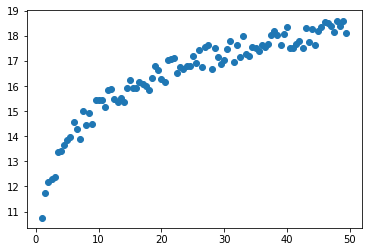

In [40]:
X = np.arange(1,50,0.5)
print(type(X))
print(X, len(X))
# 98
Y = 10 + 2*np.log(X)
print(Y, len(Y))
# 98

# Add some noise to calculate error
Y_noise = np.random.rand(len(Y))
Y = Y +Y_noise
plt.scatter(X,Y)

First column of matrix X should be 1

In [38]:
n = len(X)
print(n)
x_bias = np.ones((n,1))    # 98 rows, 1 column
print(x_bias)
print (x_bias.shape)

98
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(98, 1)


Reshape X

In [41]:
print(X.shape)

# X is numpy.ndarray
X = np.reshape(X,(n,1))
print(type(X))         # Also numpy.ndarray
print (X.shape)

(98,)
<class 'numpy.ndarray'>
(98, 1)


Using the Normal formula

Y = a + b*ln(X)

In [18]:
X_log = np.log(X)           # Calculate natural logarithm
print (X_log.shape)

(98, 1)


Form the main matrxix X

Append X_log to X_bias

In [20]:
x_new = np.append(x_bias,X_log,axis=1)
print (x_new.shape)

(98, 2)


Find the transpose matrix

In [21]:
x_new_transpose = np.transpose(x_new)
print (x_new_transpose.shape)

(2, 98)


Perform matrix multiplication: (2,98) x (98,2) = (2,2)

In [42]:
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)
print (x_new_transpose_dot_x_new.shape)
print(x_new_transpose_dot_x_new)

(2, 2)
[[ 98.         291.20578167]
 [291.20578167 936.34140116]]


Find inverse

In [44]:
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)
print (temp_1.shape)
print(temp_1)
print(temp_1.dot(x_new_transpose_dot_x_new))   # Identity matrix

(2, 2)
[[ 0.13451925 -0.041836  ]
 [-0.041836    0.01407914]]
[[1. 0.]
 [0. 1.]]


Perform matrix multiplication

In [45]:
temp_2 = x_new_transpose.dot(Y)
print (temp_2.shape)
print(temp_2)

(2,)
[1614.76734565 4936.77686917]


Find the coefficient values

In [46]:
theta = temp_1.dot(temp_2)
print (theta.shape)
print(theta)

(2,)
[10.68227127  1.95018368]


Scatter plot of the data with regression curve

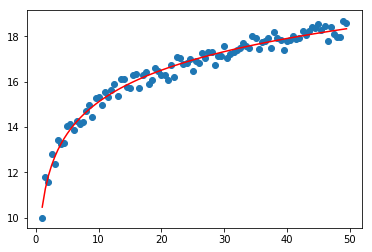

In [26]:
a = theta[0]
b = theta[1]

Y_plot = a + b*np.log(X)
plt.scatter(X,Y)
plt.plot(X,Y_plot,c="r")

Check the accuracy by computing R-squared

In [27]:
Accuracy = r2_score(Y,Y_plot)
print (Accuracy)

0.9768848340645401
